In [ ]:
#Importo librerías necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score

#Importación y observación de los datos

In [ ]:
#Cargo el dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

El dataset cuenta con 20 features y el target (y). Contiene 41188 instancias.
No tiene datos nulos, aunque no implica que estén completos. Hay features numéricos y categóricos.

In [ ]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
#A partir de lo descripto en el mail, descarto el feature 'duration' pues dada
#su naturaleza afecta la performance del modelo.

data=data.drop(['duration'],axis=1)
data.shape

(41188, 20)

#Análisis Exploratorio de los Datos

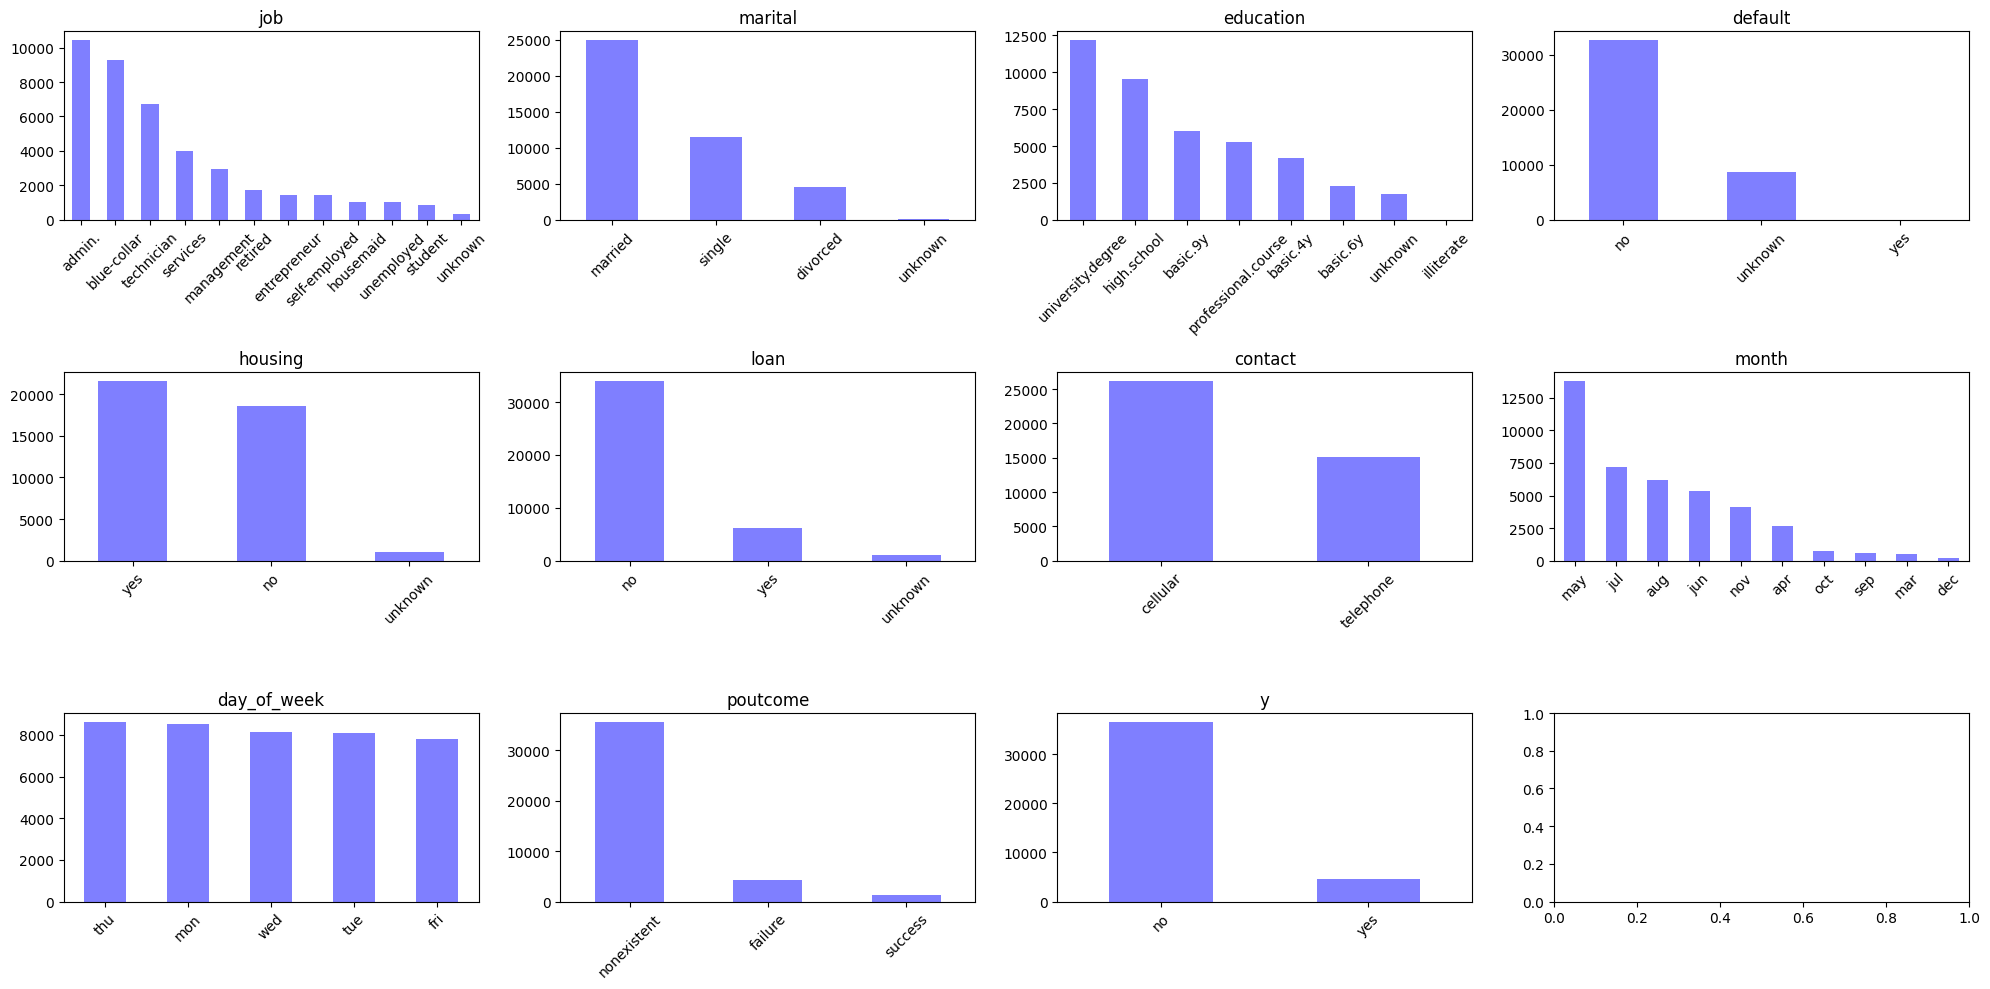

In [ ]:
#Analizo primero las variables categóricas
cat_variables = data.select_dtypes(include=[object]).columns
ROWS, COLS = 3, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 10))
row, col = 0, 0
for i, feature in enumerate(cat_variables):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[feature].value_counts().plot(kind='bar', ax=ax[row, col], color='blue', alpha=0.5)
    ax[row, col].set_title(feature)
    plt.setp(ax[row, col].xaxis.get_majorticklabels(), rotation=45) # Rotar las etiquetas del eje x
fig.tight_layout()

Podemos observar que los trabajos predominantes de los clientes son administrativos, operarios y técnicos. Prevalencen los casados y los que tienen estudios secundarios - universitarios completos. No hay personas con créditos en default. La mayoría no posee un préstamo. La mayoría de los contactos son en mayo. La mayoría no participó de campañas anteriores (poutcome). También la mayoría rechazó el plazo fijo (target desbalanceado).

Se observa que en las categorías 'job', 'marital', 'education', 'default', 'housing' y 'loan' hay datos desconocidos, 'unknown'. Dado que los datos se recopilaron a partir de entrevistas telefónicas, es posible que los clientes se negaran a proporcionar su información personal.

In [ ]:
#Ahora los vuelvo a mirar pero separados por el target, a ver si encuentro algún patrón
ROWS, COLS = 3, 4
fig, axs = plt.subplots(ROWS, COLS, figsize=(20, 10))
axs = axs.ravel()

for i, feature in enumerate(cat_variables):
    # Calcular las frecuencias para cada categoría
    freq_no = data[data['y'] == 'no'][feature].value_counts()
    freq_yes = data[data['y'] == 'yes'][feature].value_counts()

    # Crear un DataFrame para facilitar el trazado
    df_freq = pd.DataFrame({'No': freq_no, 'Sí': freq_yes})

    # Trazar el gráfico de barras apiladas
    df_freq.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.5, ax=axs[i])

    axs[i].set_title(feature)
    axs[i].legend()
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45) # Rotar las etiquetas del eje x

fig.tight_layout()

Se puede observar que la proporción de solteros que parecería aceptar poner el dinero en plazo fijo parece ser mayor respecto a los casados.

In [ ]:
#Miro la cantidad de 'unknown' por columna
for col in cat_variables:
  print(col, data[col].str.count('unknown').sum())

job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0
y 0


In [ ]:
#Ahora voy a mirar las variables numéricas
num_variables = data.select_dtypes(include=[np.number]).columns
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(20,10))
row, col = 0, 0
for i, feature in enumerate(num_variables):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col])
    ax[row, col].set_title(feature)
    ax[row, col].tick_params(axis='x', rotation=45) # Rotar las etiquetas del eje x
    ax[row, col].grid(False) # Remover la grilla
fig.tight_layout()

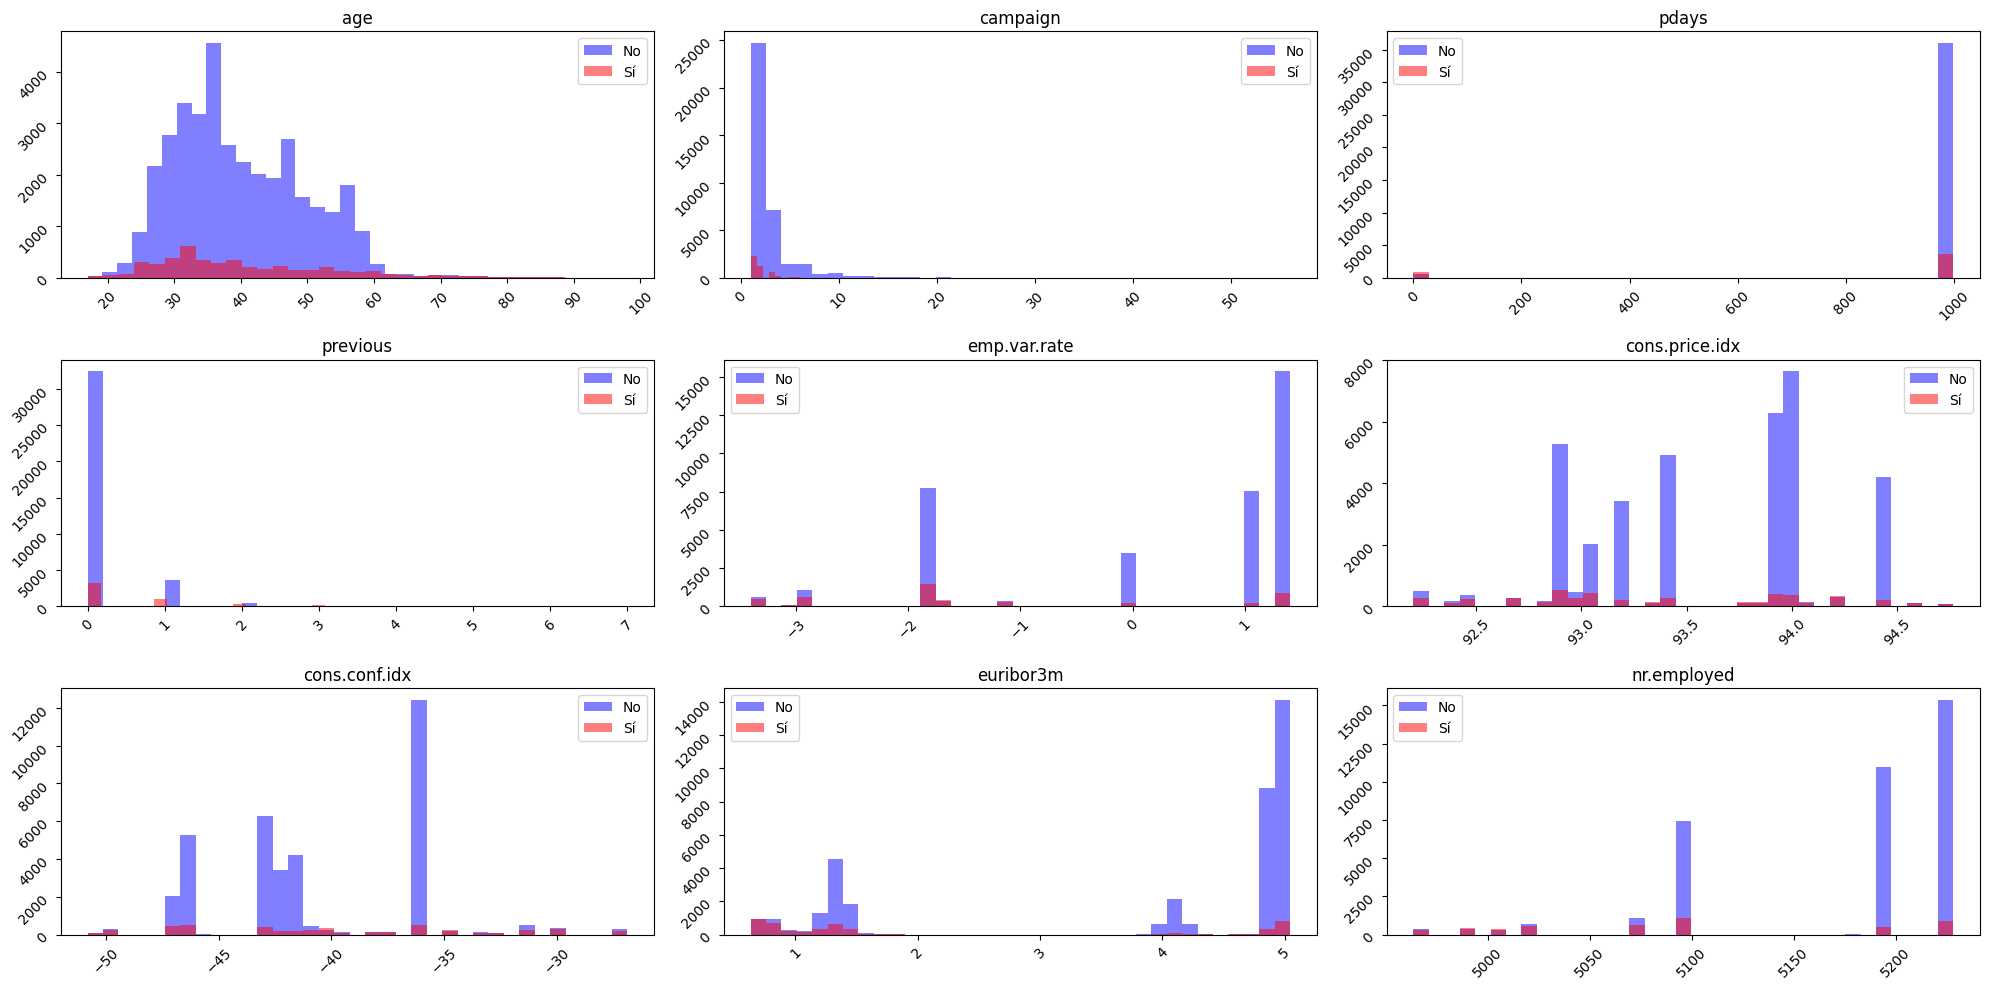

In [ ]:
#Lo miro de nuevo pero dividido por el target
ROWS, COLS = 3, 3
fig, axs = plt.subplots(ROWS, COLS, figsize=(20,10))
axs = axs.ravel()
row, col = 0, 0
for i, feature in enumerate(num_variables):
    axs[i].hist(data[data['y']=='no'][feature], bins=35, color='blue', alpha=0.5,label = "No")
    axs[i].hist(data[data['y']=='yes'][feature], bins=35, color='red', alpha=0.5, label = "Sí")
    axs[i].set_title(feature)
    axs[i].legend()
    axs[i].tick_params(labelrotation=45)
fig.tight_layout()

Mirando los gráficos observo patrones extraños, en particular en 'pdays'. En el caso de pdays, '999' significa que el cliente no había sido previamente contactado, que es acorde a lo que se observa en los gráficos de 'previous','campaign' y 'poutcome'.

In [ ]:
#Miro la variable pdays sin los datos faltantes
#plt.hist(data.loc[data.pdays != 999, 'pdays'], bins=10, color='blue', alpha=0.5)
#plt.show()

La mayoria de los llamados son hasta el dia 5, pero después se mantienen hasta el dia 30 aproximadamente. Para lidiar con este caso voy a eliminar la variable numérica y reemplazarla con columnas booleanas.

In [ ]:
#data_mod = data.copy()
#Creo las columnas
#data_mod['pdays_missing'] = 0
#data_mod['pdays_5'] = 0
#data_mod['pdays_30'] = 0
#data_mod['pdays_more_30'] = 0

#Reemplazo donde corresponda
#data_mod.loc[data_mod['pdays']==999, 'pdays_missing'] = 1
#data_mod.loc[data_mod['pdays']<=5, 'pdays_5'] = 1
#data_mod.loc[(data_mod['pdays']>5) & (data_mod['pdays']<=30), 'pdays_30'] = 1
#data_mod.loc[(data_mod['pdays'] > 30) & (data_mod['pdays']<=998), 'pdays_more_30'] = 1

#Borro la columna de 'pdays'
#data_mod = data_mod.drop(['pdays'],axis=1)

In [ ]:
#data_mod.head()

#Modelado

In [ ]:
#Separo en train y test
cols = data.columns.values.tolist()
y=data['y'].map(dict(yes=1, no=0))
X = data[[col for col in cols if col !="y"]]
X.shape ,y.shape

#Saco el target del array de variables categóricas
cat_variables = data.drop('y', axis=1).select_dtypes(include=[object]).columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (32950, 19)
y_train dataset:  (32950,)
X_test dataset:  (8238, 19)
y_test dataset:  (8238,)


In [ ]:
#Creo los pipelines
#Creo los Pipes de procesamiento, uno para los numéricos y otro para los categóricos.
#Uso SimpleImputer para rellenar los datos desconocidos

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    #('imputer', SimpleImputer(missing_values='unknown', fill_value='unknown')), #No cambia los valores, pero permite que el OHE los trate como una categoría más
    ('encoder', OneHotEncoder())
])

#Creo el Pipe de preprocesamiento, aplica los Pipes anteriores
preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, num_variables),
    ('categorical_pipeline', categorical_pipeline, cat_variables)
])

#Aplico el procesador y creo un modelo de LR
lr = Pipeline([
    ('processor', preprocessor),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

In [ ]:
parameters =  [{
   'lr__C': np.linspace(0.1, 10, 10),
}]

clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=-1)
clf.fit(X_train, y_train.ravel())

#Miro los mejores parámetros y el rendimiento en train
print("Los mejores parametros encontrados: ", clf.best_params_)
print("Mejor rendimiento en entrenamiento: ", clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Los mejores parametros encontrados:  {'lr__C': 0.1}
Mejor rendimiento en entrenamiento:  0.9007587253414264


In [ ]:
#Miro el rendimiento en test. Como el target es desbalanceado, voy a mirar F1.
y_pred = clf.predict(X_train)
print("F1 score: ", f1_score(y_train, y_pred))
#Veo la matriz de confusión
confusion_matrix(y_train, y_pred)
#Quiero ver el la precisión media del modelo
average_precision_score(y_train, y_pred)

F1 score:  0.34593724859211583


0.24389790222347327

El f1 y el AP de entrenamiento dieron muy bajo. Es posible que el desbalance de clases y el querer predecir el target minoritario (yes) estén perjudicando el rendimiento. Voy a probar con SMOTE (Synthetic Minority Over-sampling Technique). Para usar SMOTE, primero tengo que codificar los categóricos.

In [ ]:
lr_sm = imbPipeline([
   ('processor', preprocessor),
   ('smote', SMOTE(random_state=42)),
   ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

parameters =  [{
   'lr__C': np.linspace(1, 15, 10),
}]
clf2 = GridSearchCV(lr_sm, parameters, cv=5, verbose=5, n_jobs=-1)
clf2.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical_pipeline',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotE...
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid=[{'lr__C': array([ 1.        ,  2.55555556,  4.11111111,  5.66666667,  7.22222222,
        8.77777778, 10.33333333, 11.88888889, 13.44444444, 15.        ])}],
             verbose=5)

In [ ]:
#Miro los mejores parámetros y el rendimiento en train
print("Los mejores parametros encontrados: ", clf2.best_params_)
print("Mejor rendimiento en entrenamiento: ", clf2.best_score_)

#Miro el rendimiento en test. Como el target es desbalanceado, voy a mirar F1.
y_pred2 = clf2.predict(X_train)
print("F1 score: ", f1_score(y_train, y_pred2))
#Veo la matriz de confusión
confusion_matrix(y_train, y_pred2)
#Quiero ver el la precisión media del modelo
average_precision_score(y_train, y_pred2)

Los mejores parametros encontrados:  {'lr__C': 8.777777777777779}
Mejor rendimiento en entrenamiento:  0.8230349013657057
F1 score:  0.44714367052571646


0.26019654296710637

In [ ]:
#Ahora voy a probar un Random Forest